Business Objective:

The goal is to predict whether a patient has heart disease based on the medical attributes in the dataset. This can help healthcare providers identify at-risk patients and administer timely interventions.

Constraints:

Data Quality: The model's accuracy depends on the completeness and quality of the data. Missing values, noise, or outliers could impact predictions.

Interpretability: Medical predictions often need to be explainable for healthcare professionals to trust the model's outputs.

Accuracy: False negatives (predicting no heart disease when there is) could have serious consequences, so minimizing these errors is crucial.

Computational Efficiency: The model should perform efficiently with large-scale medical data, ensuring timely results.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('heart disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#is there any null values present or not 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

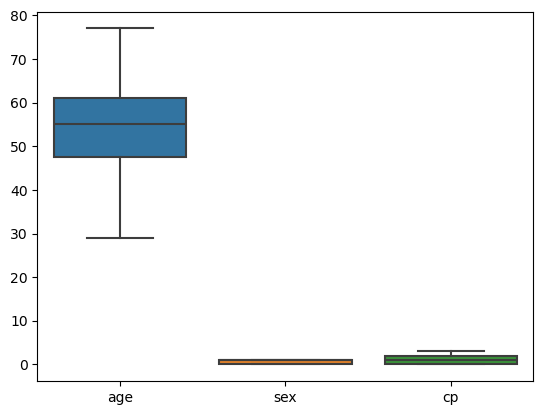

In [7]:
#to understand and check if the outliers are present or not for each of column or feature
#use boxplot
#Boxplot
import seaborn as sns
sns.boxplot(df[['age', 'sex','cp']])

<Axes: >

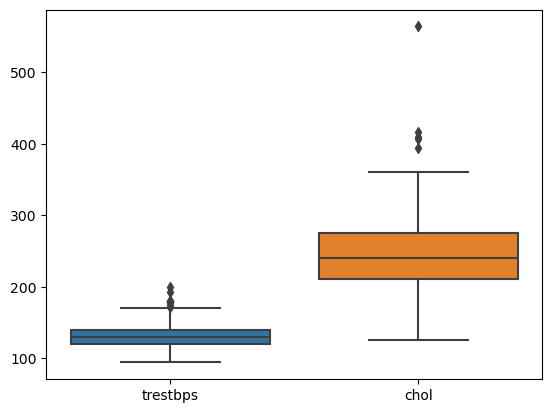

In [8]:
sns.boxplot(df[['trestbps', 'chol']])

<Axes: >

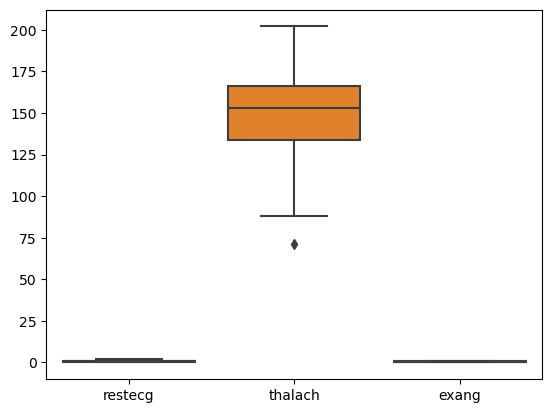

In [9]:
sns.boxplot(df[['restecg', 'thalach', 'exang']])

<Axes: >

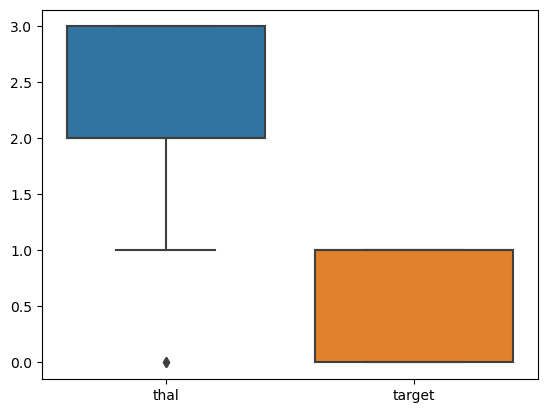

In [10]:
sns.boxplot(df[['thal','target']])

<Axes: >

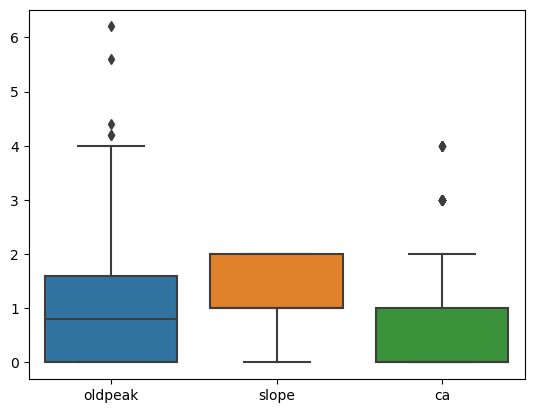

In [11]:
sns.boxplot(df[['oldpeak', 'slope', 'ca']])

In [12]:
outliers_columns=['trestbps','chol','fbs','thalach','oldpeak','ca','thal']

In [16]:
# Apply log transformation to the specified columns
for column in outliers_columns:
    # Adding a small constant to avoid issues with log(0)
    df[column] = np.log1p(df[column])

In [17]:
def remove_out(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df= remove_out(df,outliers_columns)

<Axes: >

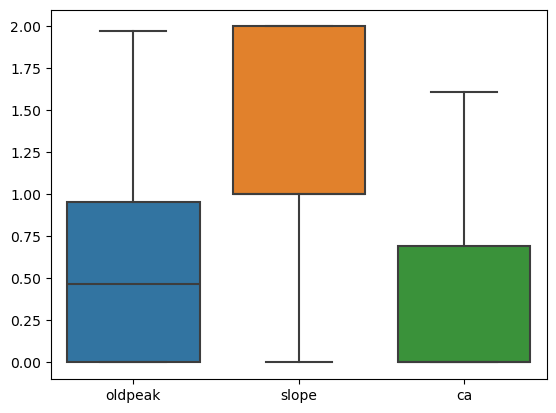

In [18]:
sns.boxplot(df[['oldpeak', 'slope', 'ca']])

In [19]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [21]:
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.790030,0.672593,1.065879,0.071825,0.230409,0.0,0.878654,1.485201,-0.679027,1.809708,-2.374541,-0.753607,-0.471365,0.898559
1,-1.363291,-1.486784,0.077003,0.071825,-0.864227,0.0,-1.035557,0.946022,-0.679027,0.605711,0.964871,-0.753607,-0.471365,0.898559
2,0.236980,0.672593,0.077003,-0.614029,-0.079922,0.0,0.878654,1.167102,-0.679027,0.054703,0.964871,-0.753607,-0.471365,0.898559
3,0.343665,-1.486784,-0.911873,-0.614029,2.104871,0.0,0.878654,0.599592,1.472695,-0.170891,0.964871,-0.753607,-0.471365,0.898559
4,0.343665,0.672593,-0.911873,0.707201,-1.190384,0.0,0.878654,-0.022391,-0.679027,-0.426649,-0.704835,-0.753607,-2.732907,0.898559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.983773,0.672593,-0.911873,0.707201,-1.332312,0.0,-1.035557,-0.198848,1.472695,2.011509,0.964871,1.452930,1.133225,-1.112894
240,0.983773,-1.486784,-0.911873,-0.333119,-1.052087,0.0,0.878654,-0.566855,1.472695,-1.071107,-0.704835,-0.753607,-0.471365,-1.112894
241,0.343665,-1.486784,-0.911873,0.707201,0.032966,0.0,0.878654,-1.213345,1.472695,-0.721900,-0.704835,-0.753607,1.133225,-1.112894
242,-0.936552,0.672593,2.054754,-1.359079,0.523891,0.0,0.878654,-0.758999,-0.679027,0.439055,-0.704835,-0.753607,1.133225,-1.112894


<Axes: >

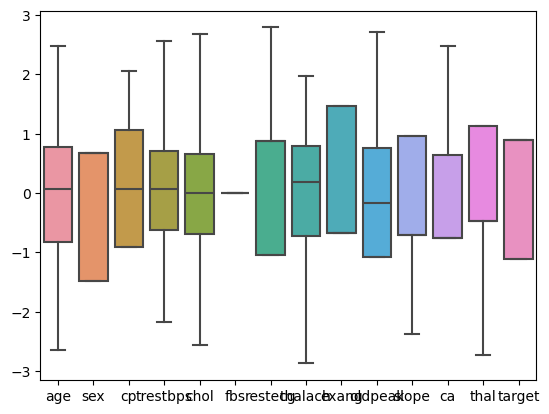

In [22]:
sns.boxplot(df_scaled)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


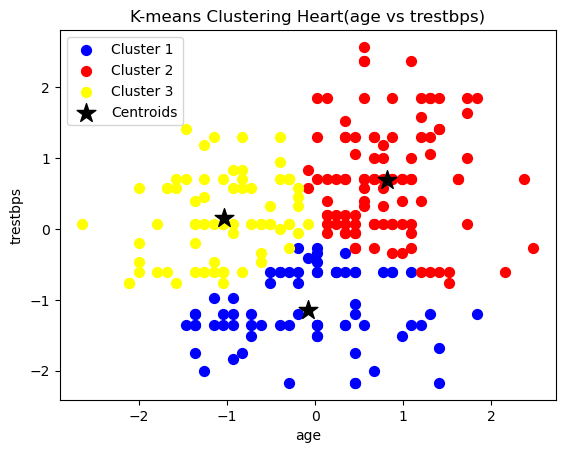

In [23]:
# Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['age', 'trestbps']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['age'], df_cluster1['trestbps'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['age'], df_cluster2['trestbps'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['age'], df_cluster3['trestbps'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('K-means Clustering Heart(age vs trestbps)')
plt.legend()
plt.show()

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


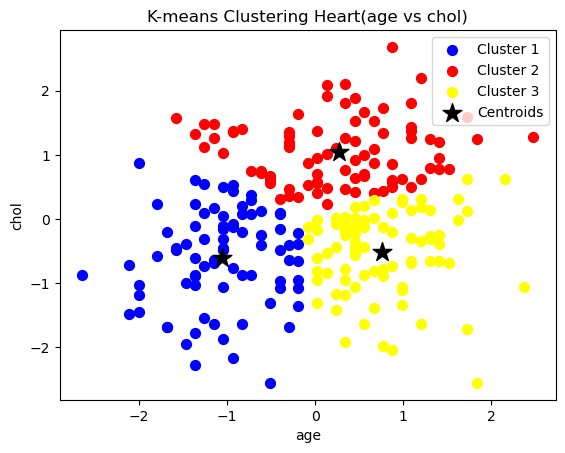

In [24]:
# Perform K-means clustering based on alcohol and malic acid
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled[['age', 'chol']])

# Get cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Create dataframes for different clusters
df_cluster1 = df_scaled[y_kmeans == 0]
df_cluster2 = df_scaled[y_kmeans == 1]
df_cluster3 = df_scaled[y_kmeans == 2]

# Plot the clusters and centroids
plt.scatter(df_cluster1['age'], df_cluster1['chol'], s=50, c='blue', label='Cluster 1')
plt.scatter(df_cluster2['age'], df_cluster2['chol'], s=50, c='red', label='Cluster 2')
plt.scatter(df_cluster3['age'], df_cluster3['chol'], s=50, c='yellow', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('K-means Clustering Heart(age vs chol)')
plt.legend()

In [25]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Print the explained variance ratio for each component
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
     

Explained Variance Ratio: [0.2593761  0.11120794 0.09560606]


In [26]:
#calculate silhoutte score average
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(df, y_kmeans)
print(sil_score)

0.13686501042348798


In [27]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 3.6184379767129387
